In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

In [7]:
%run eval_nonstat.py

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Smooth (k=200)')

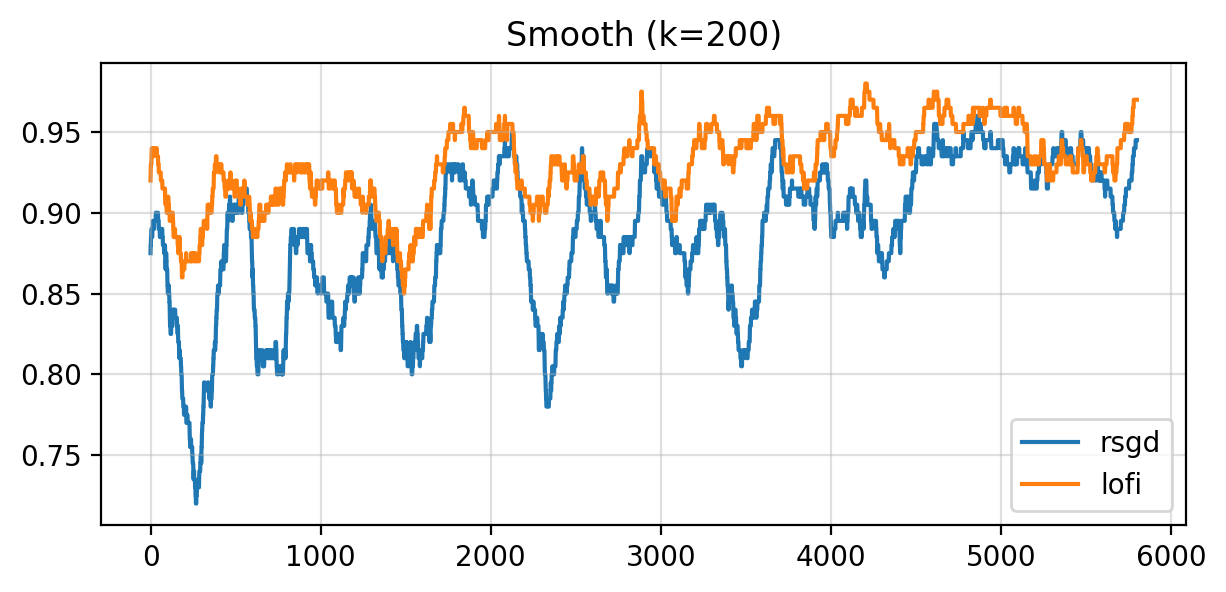

In [11]:
ksize = 200
keyv = "osa-error"

fig, ax = plt.subplots(figsize=(7, 3))

kernel = np.ones(ksize) / ksize

err_rsgd = outputs_rsgd[keyv]
err_smooth_rsgd = np.convolve(err_rsgd, kernel, mode="valid")

err_lofi = outputs_lofi[keyv]
err_smooth_lofi = np.convolve(err_lofi, kernel, mode="valid")


ax.plot(err_smooth_rsgd, zorder=0, label="rsgd")
ax.plot(err_smooth_lofi, zorder=0, label="lofi")

# vmax = np.quantile(err_smooth, 1.0)
# vmin = np.quantile(err_smooth, 0.0)
# ax.set_ylim(vmin, vmax)
ax.legend()
ax.grid(alpha=0.4)
plt.title(f"Smooth (k={ksize})")

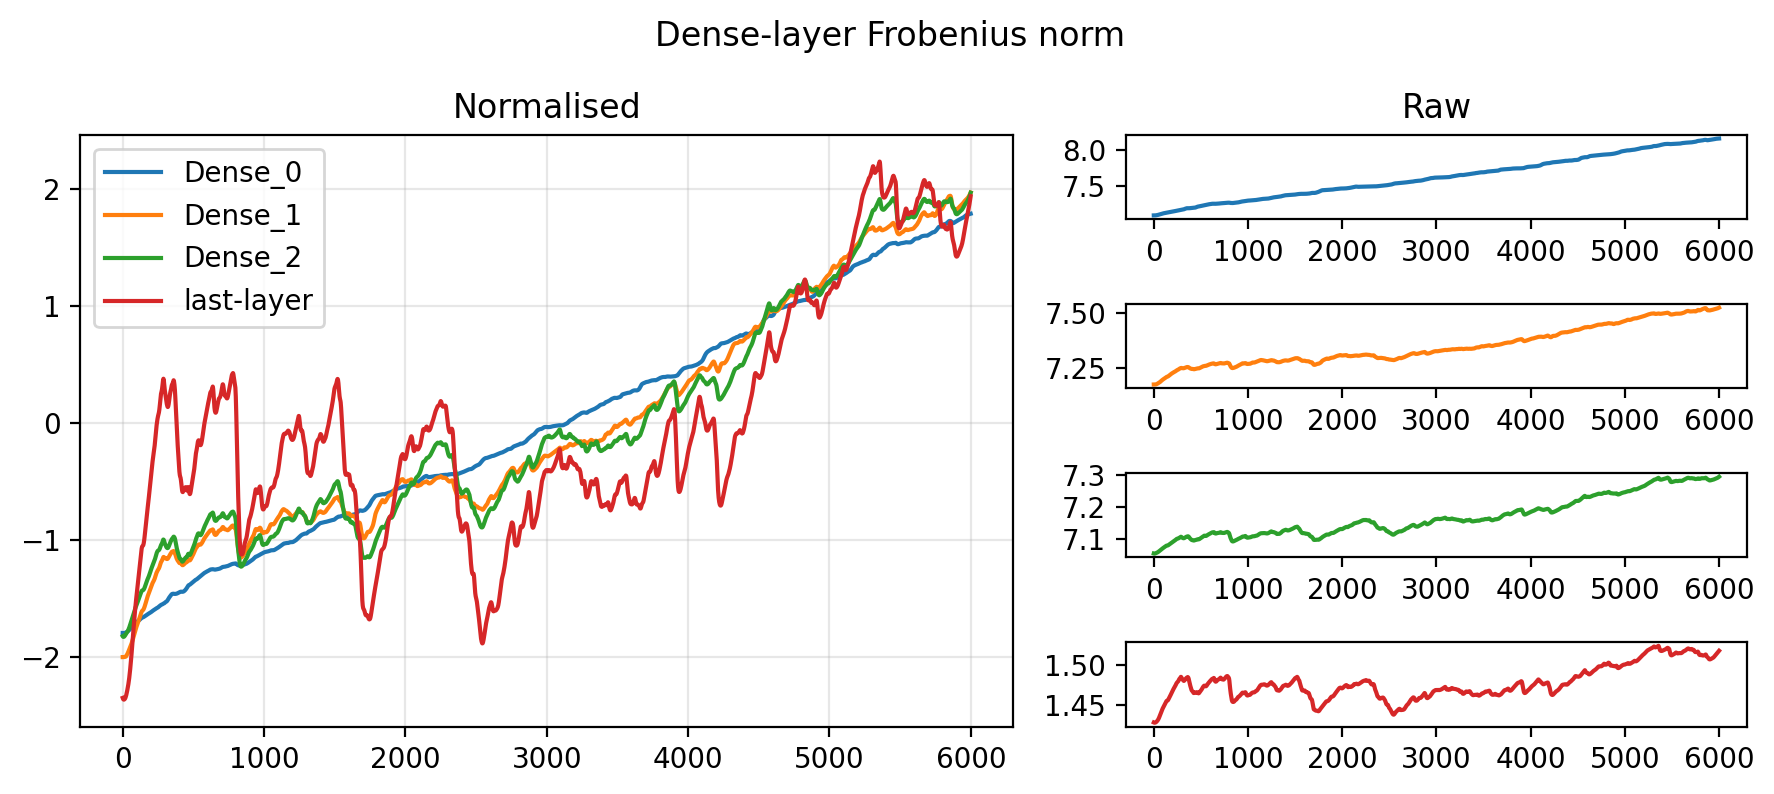

In [12]:
params_magnitude = outputs_rsgd["params_magnitude"]["params"]
colors = plt.cm.tab10(np.arange(0, len(params_magnitude)))
# Create the figure and GridSpec
fig = plt.figure(figsize=(9, 4))
gs = plt.GridSpec(nrows=4, ncols=2, figure=fig, width_ratios=[0.6, 0.4])

# Create the subplots
# Create the subplots
ax_main = fig.add_subplot(gs[:, 0])
for key, color in zip(params_magnitude, colors):
    v = params_magnitude[key]
    vnorm = (v - v.mean()) / v.std()
    ax_main.plot(vnorm, c=color, label=key)
ax_main.legend()

for i, key in enumerate(params_magnitude):
    ax = fig.add_subplot(gs[i, 1])
    if i == 0:
        ax.set_title("Raw")
    v = params_magnitude[key]
    ax.plot(v, color=colors[i])
plt.suptitle("Dense-layer Frobenius norm")
ax_main.grid(alpha=0.3)
ax_main.set_title("Normalised")
plt.tight_layout()